# Financial Analysis 

### Terms
- **Security** = A document; historically, a physical certificate but increasingly electronic, showing that one owns a portion of a publicly-traded company or is owed a portion of a debt issue. Securities are tradable. At their most basic, securities refer to stocks and bonds, but the term sometimes also refers to derivatives such as futures and options.

- **Financial Security** = a financial instrument issued by companies, financial institutions and the government as a means of borrowing money and raising new capital. The most commonly used financial securities are SHARES, STOCKS, DEBENTURES, BILLS OF EXCHANGE, TREASURY BILLS and BONDS. Once issued these securities can be bought and sold either on the MONEY MARKETS or on the STOCK MARKET. 

- **Capital Assets Pricing Model (CAPM)** = describes the relationship beyween *expected* return and risk of securities. It indicates the expected return on a security being == risk free return + risk premium

- **Risk Free Asset** = CAPM assumes there exists a risk free asset with 0 standard deviation. Risk averse investors are those who like these assets (low risk and earning returns). Ex: US Gov't Treasury Bond for 10 yrs

- **Market Portfolio** includes all securities in the market. Ex: S&P 500 index, a guage of large capital US equities

- **Beta** = represents the slope of the regression line (makret return vs stock return). It measures the volatility / systematic risk of a security compared to the entire market, used in CAPM for showing relationships between systematic risk and expected return for assets
    - Beta = 1.0 = strong price activity, correlated with the market
    - Beta < 1 = (defensive) the security is less volatile than the market
    - Beta > 1 = (aggressive) the security price is more volatile than the market. Ex: Tesla, Beta =1.26, meaning 26% more volatile than the market, better in booming economy/ worse in recession
    



- https://en.wikipedia.org/wiki/List_of_S%26P_500_companies

### CAPM Formula

- expected return on security <code>(R_i)</code>
- risk free rate of return <code>(R_f)</code>
- beta between stock & market <code>(B_i)</code>
- risk premium (incentive for risky investment in a security) <code>(R_m - R_f)</code>

<code>R_i = (R_f) + (B_i) * (R_m - R_f)</code>

### Example: Apple Stock (AAPL)

In [6]:
R_f = 0 # 0%
R_m = 12.4 # S&P 500 rate of return = 12.4%
B_i = 1.11 # Beta AAPL = 1.11

# Expected return for Apple Stock (AAPL)
R_i = R_f + B_i * (R_m - R_f)
R_i
print("Expected return on this stock is: {:.2f}%".format(R_i))

Expected return on this stock is: 13.76%


In [7]:
import pandas as pd
import numpy as np
import seaborn as sns
import plotly.express as px
import matplotlib.pyplot as plt
import plotly.figure_factory as ff
import plotly.graph_objects as go


In [11]:
stocks_df = pd.read_csv('stock.csv')
stocks_df.head()
# stocks_df.tail()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [9]:
stocks_df.shape

(2159, 10)

In [19]:
print("Total number of stocks: {}".format(len(stocks_df[1:]))) 

Total number of stocks: 2158


In [25]:
print("Number of stock names: {}".format(len(stocks_df.columns[1:])))
print("Stock names: {}".format(list(stocks_df.columns[1:])))

Number of stock names: 9
Stock names: ['AAPL', 'BA', 'T', 'MGM', 'AMZN', 'IBM', 'TSLA', 'GOOG', 'sp500']


In [29]:
x = list(stocks_df.columns[1:])
x[0] 

'AAPL'

In [13]:
# Sort the data based on Date
stocks_df = stocks_df.sort_values(by = ['Date'])
stocks_df.head()

Date       AAPL         BA          T    MGM        AMZN         IBM  \
0  2012-01-12  60.198570  75.510002  30.120001  12.13  175.929993  180.550003   
1  2012-01-13  59.972858  74.599998  30.070000  12.35  178.419998  179.160004   
2  2012-01-17  60.671429  75.239998  30.250000  12.25  181.660004  180.000000   
3  2012-01-18  61.301430  75.059998  30.330000  12.73  189.440002  181.070007   
4  2012-01-19  61.107143  75.559998  30.420000  12.80  194.449997  180.520004   

        TSLA        GOOG        sp500  
0  28.250000  313.644379  1295.500000  
1  22.790001  311.328064  1289.089966  
2  26.600000  313.116364  1293.670044  
3  26.809999  315.273285  1308.040039  
4  26.760000  318.590851  1314.500000

In [31]:
stocks_df.mean() # average stock price

AAPL      140.819823
BA        189.942700
T          35.162899
MGM        23.105743
AMZN      915.665665
IBM       161.853001
TSLA      259.600815
GOOG      783.712512
sp500    2218.749554
dtype: float64

In [33]:
stocks_df.std() # max deviation of stocks

AAPL      70.827601
BA       103.678586
T          3.207490
MGM        6.963847
AMZN     697.838905
IBM       25.561938
TSLA     210.988003
GOOG     334.448057
sp500    537.321727
dtype: float64

In [35]:
# max price of stock 
stocks_df.describe()['AMZN']

count    2159.000000
mean      915.665665
std       697.838905
min       175.929993
25%       316.490005
50%       676.010010
75%      1593.645019
max      3225.000000
Name: AMZN, dtype: float64

## Data Analysis & Visualization

In [37]:
# check for null values
stocks_df.isnull().sum() 

Date     0
AAPL     0
BA       0
T        0
MGM      0
AMZN     0
IBM      0
TSLA     0
GOOG     0
sp500    0
dtype: int64

In [39]:
# getting df dtypes
stocks_df.info() 

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2159 entries, 0 to 2158
Data columns (total 10 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   Date    2159 non-null   object 
 1   AAPL    2159 non-null   float64
 2   BA      2159 non-null   float64
 3   T       2159 non-null   float64
 4   MGM     2159 non-null   float64
 5   AMZN    2159 non-null   float64
 6   IBM     2159 non-null   float64
 7   TSLA    2159 non-null   float64
 8   GOOG    2159 non-null   float64
 9   sp500   2159 non-null   float64
dtypes: float64(9), object(1)
memory usage: 185.5+ KB


In [66]:
# plot stock data

def show_plot(df, fig_title):
    plt.style.use('dark_background')
    df.plot(x='Date',figsize=(25,10), linewidth=3, title=fig_title)
    plt.legend(fontsize=15)
    plt.xlabel("Date", fontsize=20)
    plt.ylabel("Price $", fontsize=20)
    plt.title(fig_title, fontsize=20)
    plt.grid()
    plt.show()
    

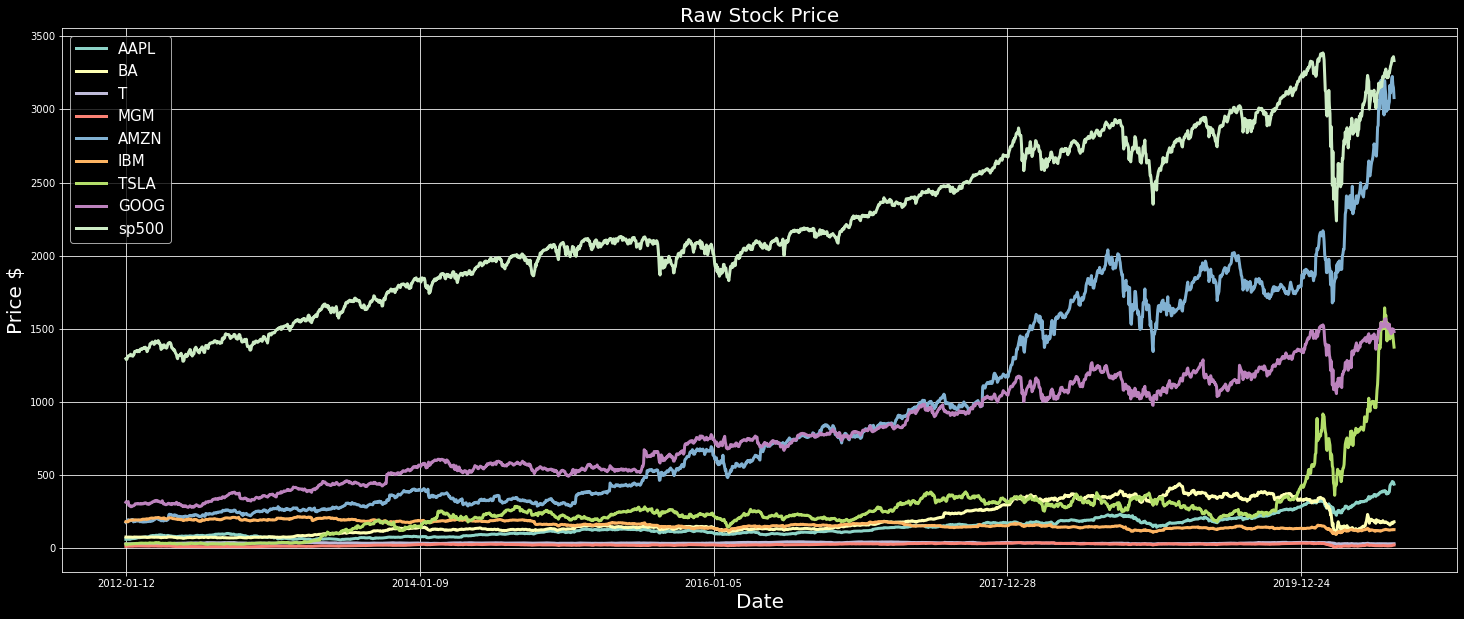

In [67]:
show_plot(stocks_df,"Raw Stock Price")

In [68]:
from copy import copy

# Function to normalize the prices based on the initial price
# take stock values div by initial value (row 1)
# Ex: ALL sp500 values divide by 1295.500000 == 1.00
def normalize(df):
    x = df.copy()
    for i in x.columns[1:]:
        x[i] = x[i]/x[i][0] # column i / row i 
    return x # make sure return is not indented => diff results
    

In [69]:
normalize(stocks_df).head() 

# first row is $1, over time that $1 becomes more. 
# Ex: TSLA  $1 2012-01012 becomes $48.65 in 2020-08-11

Date      AAPL        BA         T       MGM      AMZN       IBM  \
0  2012-01-12  1.000000  1.000000  1.000000  1.000000  1.000000  1.000000   
1  2012-01-13  0.996251  0.987949  0.998340  1.018137  1.014153  0.992301   
2  2012-01-17  1.007855  0.996424  1.004316  1.009893  1.032570  0.996954   
3  2012-01-18  1.018320  0.994040  1.006972  1.049464  1.076792  1.002880   
4  2012-01-19  1.015093  1.000662  1.009960  1.055235  1.105269  0.999834   

       TSLA      GOOG     sp500  
0  1.000000  1.000000  1.000000  
1  0.806726  0.992615  0.995052  
2  0.941593  0.998317  0.998587  
3  0.949027  1.005193  1.009680  
4  0.947257  1.015771  1.014666

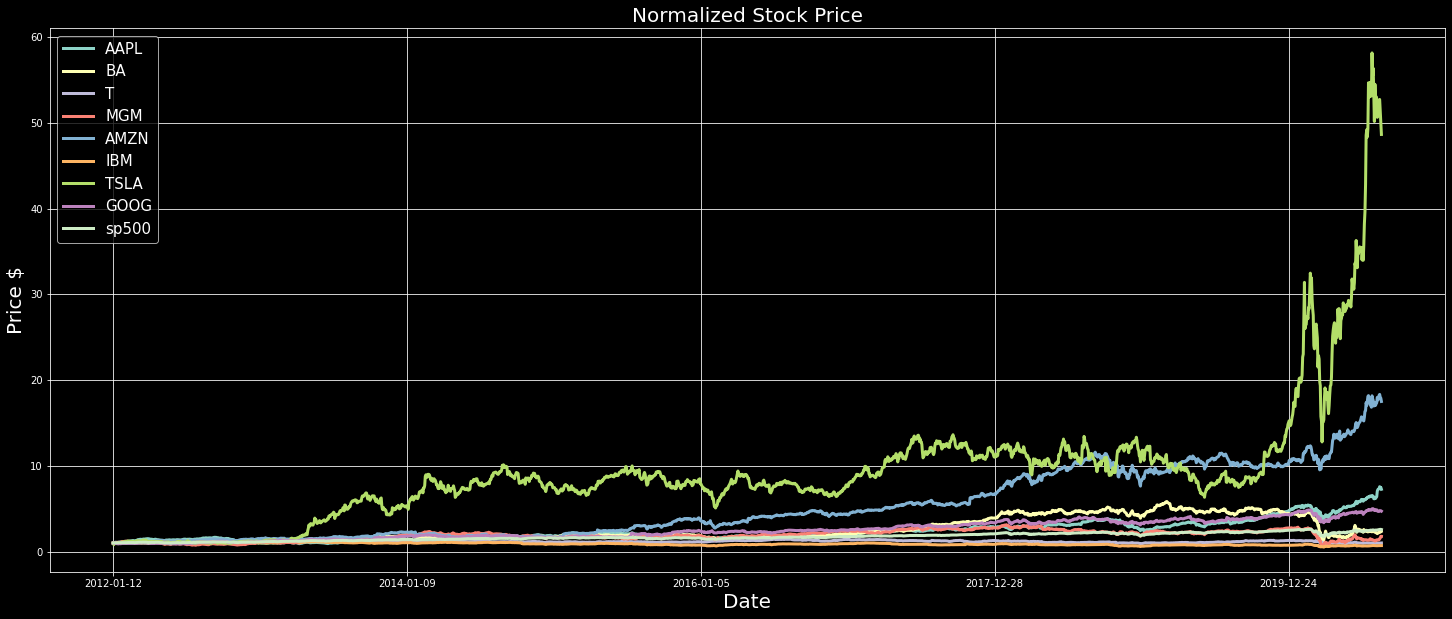

In [70]:
# plot normalized data
normal = normalize(stocks_df) 
show_plot(normal,"Normalized Stock Price")

In [94]:
# PLOTLY PLOTS

def plotly_plot(df, title):
    
    fig = px.line(title=title)
    
    for i in df.columns[1:]:
        # add scatter trace to object
        fig.add_scatter(x=df['Date'] , y=df[i] , name= i) # i = name of stocks
        fig.layout.template = 'plotly_dark'
        
    fig.show()

In [95]:
plotly_plot(stocks_df, "Plotly: Stock Prices")

In [96]:
# plot normalized data
normal = normalize(stocks_df) 
plotly_plot(normal, "Plotly: Stock Prices (Normalized)")

Scenario: assume Quark owns 100 shares of the S&P 500 and bought them on stardate Feb 19, 2020. 
- How much did Quark lose in ($) by March 23, 2020?

In [166]:
# feb 19
f19 = 2.613778
# mar 23
m23 =1.727
net_loss = f19 - m23 
print('lost $',net_loss*100)

# stocks_df.Date  
start = normal.Date.iloc[2037] # 2037 = '2020-02-19'
end = normal.Date.iloc[2060] # 2060 = '2020-03-23'
print(start,':',end)

normal['sp500'].iloc[2037:2061]

x = normal['sp500'].iloc[2037] - normal['sp500'].iloc[2060]
x

lost $ 88.67779999999999
2020-02-19 : 2020-03-23


0.8867232728676187

### Calculate the individual stock daily returns

In [265]:
# sp500 column
# df = stocks_df['sp500'] 
# df

# AMZN stock
df = stocks_df['AMZN'] 
df 

0        175.929993
1        178.419998
2        181.660004
3        189.440002
4        194.449997
           ...     
2154    3205.030029
2155    3225.000000
2156    3167.459961
2157    3148.159912
2158    3080.669922
Name: AMZN, Length: 2159, dtype: float64

In [266]:
# loop thru all elements
for j in range(1, len(df)):
    df_daily_return[j] = ( (df[j] - df[j-1]) / df[j-1] ) *100
    
df_daily_return[0] = 0
df_daily_return

0       0.000000
1       1.415339
2       1.815943
3       4.282725
4       2.644634
          ...   
2154    2.109065
2155    0.623082
2156   -1.784187
2157   -0.609323
2158   -2.143792
Name: sp500, Length: 2159, dtype: float64

## Multiple Stocks Daily Return %

In [270]:
def daily_return(df):
    df_daily_return =df.copy()
    
    # nested for loop, loop for columns
    for i in df.columns[1:]: # skip date column
        for j in range(1, len(df)): # loop on rows
            df_daily_return[i][j] = ( (df[i][j] - df[i][j-1]) / df[i][j-1] ) *100 # column, rows
    
    df_daily_return[i][0] = 0
    
    return df_daily_return

In [271]:
# call function
stocks_daily_return = daily_return(stocks_df)

In [272]:
stocks_daily_return

Date       AAPL         BA          T        MGM        AMZN  \
0     2012-01-12  60.198570  75.510002  30.120001  12.130000  175.929993   
1     2012-01-13  -0.374946  -1.205144  -0.166006   1.813685    1.415339   
2     2012-01-17   1.164812   0.857909   0.598603  -0.809717    1.815943   
3     2012-01-18   1.038382  -0.239234   0.264463   3.918367    4.282725   
4     2012-01-19  -0.316937   0.666134   0.296736   0.549882    2.644634   
...          ...        ...        ...        ...        ...         ...   
2154  2020-08-05   0.362467   5.579446  -0.533156   0.000000    2.109065   
2155  2020-08-06   3.488923  -1.193483  -0.033501  10.406699    0.623082   
2156  2020-08-07  -2.449458  -1.265966   0.603217   3.087768   -1.784187   
2157  2020-08-10   1.453480   5.522880   0.599604  13.767729   -0.609323   
2158  2020-08-11  -2.973987   0.401316   0.000000  -0.692841   -2.143792   

             IBM       TSLA        GOOG     sp500  
0     180.550003  28.250000  313.644379  0.000000  
1      -0.769869 -19.327430   -0.738516 -0.494792  
2       0.468852  16.717854    0.574410  0.355295  
3       0.594448   0.789470    0.688856  1.110793  
4      -0.303752  -0.186494    1.052283  0.493866  
...          ...        ...         ...       ...  
2154   -0.309917  -0.133153    0.589774  0.642974  
2155    0.534082   0.307062    1.797626  0.642770  
2156   -0.919762  -2.475194   -0.373974  0.063303  
2157    1.720552  -2.350092    0.107728  0.274222  
2158   -0.283220  -3.114399   -1.054744 -0.796913  

[2159 rows x 10 columns]

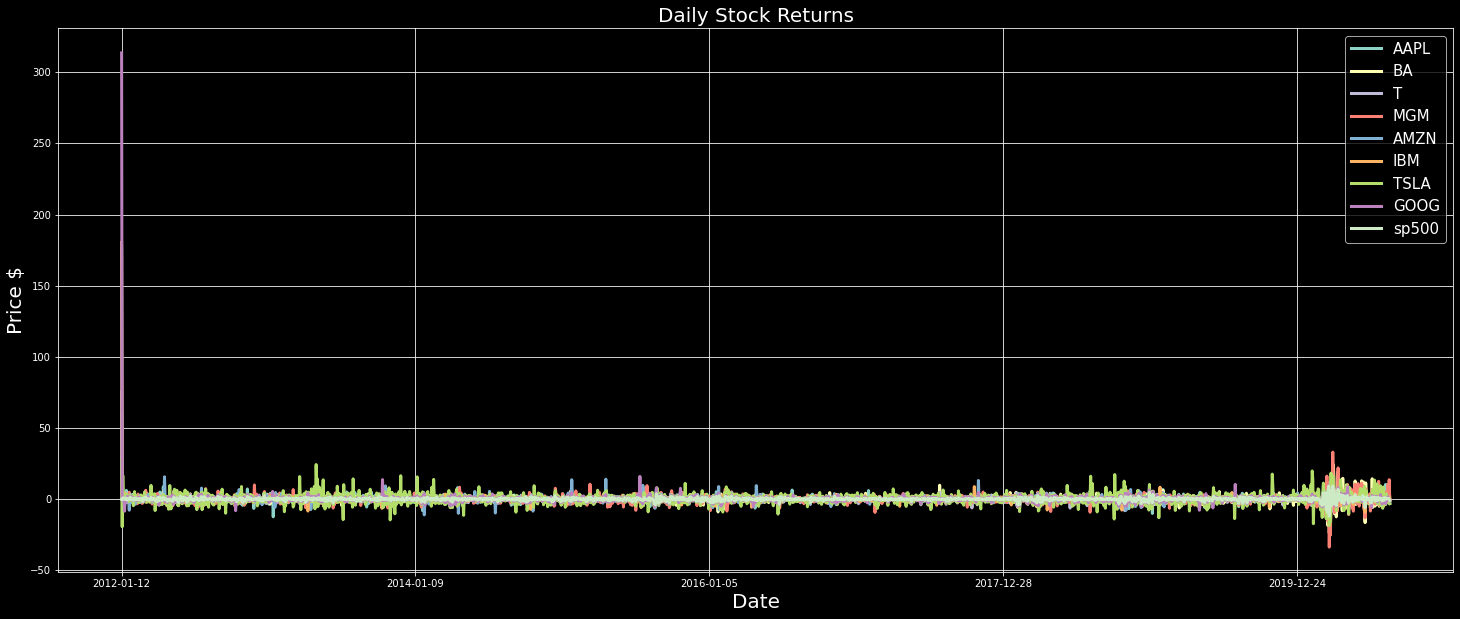

In [273]:
# plot daily returns

# static plot
show_plot(stocks_daily_return, "Daily Stock Returns")

In [275]:
# interactive plot
plotly_plot(stocks_daily_return, "Plotly: Daily Stock Returns")

## Calculate correlations between daily returns

<AxesSubplot:>

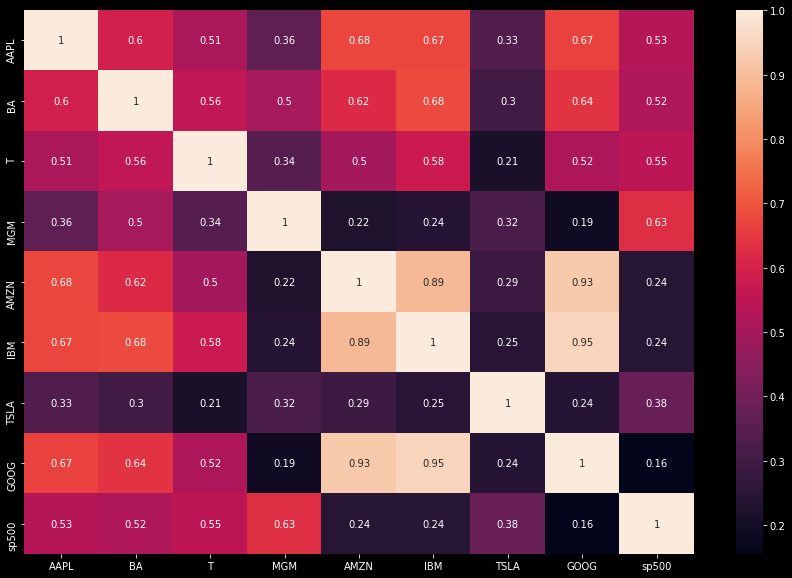

In [276]:
# correlation matrix
cm = stocks_daily_return.drop(columns=['Date']).corr() # drop date

# use Seaborn heatmap
plt.figure(figsize=(15,10))
sns.heatmap(cm, annot=True)

- what top 2 stocks that are positively correlated with S&P500?
- what is the correlation between Amazon and Boeing, MGM and Boeing?


## Plot Histograms for daily returns

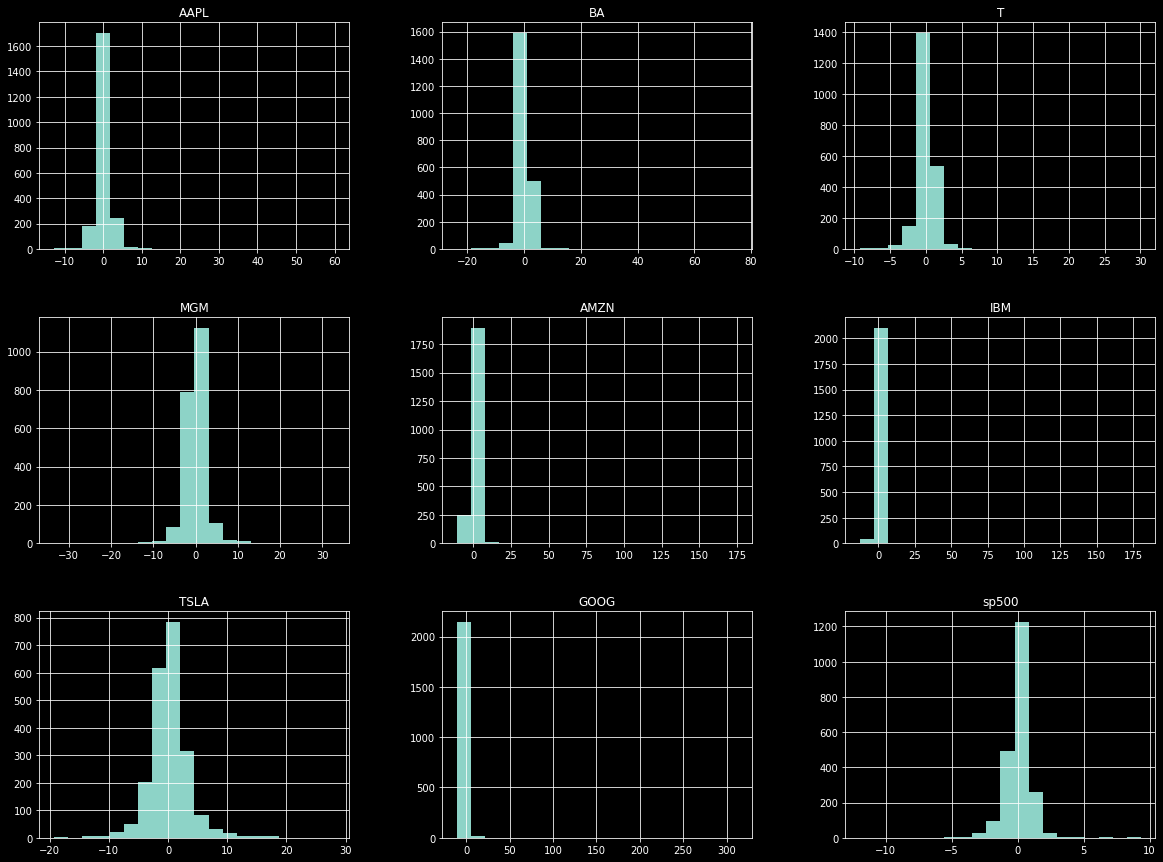

In [281]:
stocks_daily_return.hist(figsize=(20,15), bins=20);

In [286]:
#  interactive histogram

df_hist = stocks_daily_return.copy()

df_hist = df_hist.drop(columns=['Date'])
data = []

for i in df_hist.columns:
    data.append(stocks_daily_return[i].values)
    
# data is list array

# plotly figure factory module (ff) subplots
fig = ff.create_distplot(data, df_hist.columns)
fig.layout.template = 'plotly_dark'
fig.show()